# Lab #2

# Stochastic

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
%matplotlib inline

In [3]:
# yi = a*xi + b (and a = -2, b = 1)
x_Data = np.linspace(start=0, stop=20, num=50)
np.random.shuffle(x_Data)
y_Data = -2*x_Data + 1

In [29]:
J_Plot = []
theta0_Plot = []
theta1_Plot = []
J_Plot_1 = []
theta0_Plot_1 = []
theta1_Plot_1 = []
epoch_Plot = []

def Stochastic_GD(x_Data, y_Data):
    alpha = 0.00001
    theta0 = theta1 = 0
    J_errorFunc = 0
    pre_error = np.inf
    
    for j in range(100):

        for i in range(50):
            y_Predict = theta0 + theta1*x_Data[i]
            err_Val = y_Predict - y_Data[i]
            J_errorFunc = (err_Val**2) / 2

            J_Plot.append(J_errorFunc)
            theta0_Plot.append(theta0)
            theta1_Plot.append(theta1)

            grad_Th0 = err_Val
            grad_Th1 = err_Val*x_Data[i]

            theta0 = theta0 - alpha*grad_Th0
            theta1 = theta1 - alpha*grad_Th1
            
        epoch_Plot.append(j)
        J_Plot_1.append(J_Plot[-1])
        theta0_Plot_1.append(theta0_Plot[-1])
        theta1_Plot_1.append(theta1_Plot[-1])
        if (pre_error - J_errorFunc) < 0.001:
            break
        pre_error = J_errorFunc
            
    return (theta0, theta1)

In [30]:
l0, l1 = Stochastic_GD(x_Data=x_Data, y_Data=y_Data)
y_Pre_F = l0 + l1*x_Data

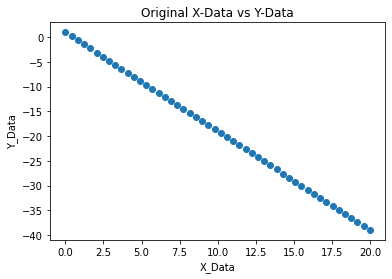

In [31]:
plt.scatter(x_Data, y_Data)
plt.xlabel("X_Data")
plt.ylabel("Y_Data")
plt.title("Original X-Data vs Y-Data")
plt.show()

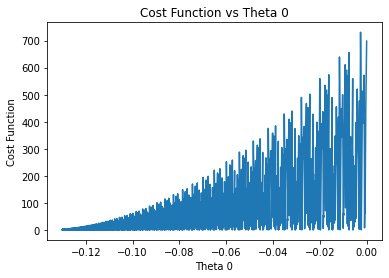

In [32]:
plt.xlabel("Theta 0")
plt.ylabel("Cost Function")
plt.title("Cost Function vs Theta 0")
plt.plot(theta0_Plot, J_Plot)
plt.show()

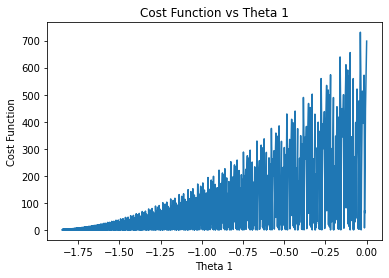

In [33]:
plt.xlabel("Theta 1")
plt.ylabel("Cost Function")
plt.title("Cost Function vs Theta 1")
plt.plot(theta1_Plot, J_Plot)
plt.show()

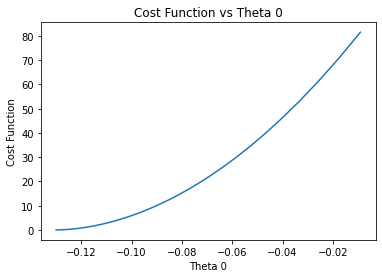

In [34]:
plt.xlabel("Theta 0")
plt.ylabel("Cost Function")
plt.title("Cost Function vs Theta 0")
plt.plot(theta0_Plot_1, J_Plot_1)
plt.show()

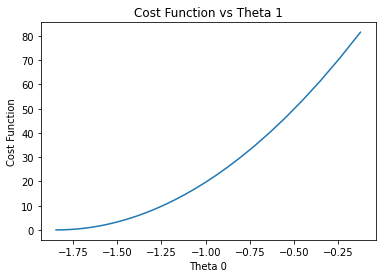

In [35]:
plt.xlabel("Theta 0")
plt.ylabel("Cost Function")
plt.title("Cost Function vs Theta 1")
plt.plot(theta1_Plot_1, J_Plot_1)
plt.show()

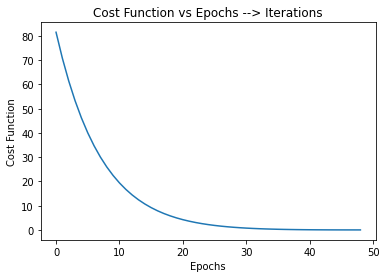

In [36]:
plt.xlabel("Epochs")
plt.ylabel("Cost Function")
plt.title("Cost Function vs Epochs --> Iterations")
plt.plot(epoch_Plot, J_Plot_1)
plt.show()

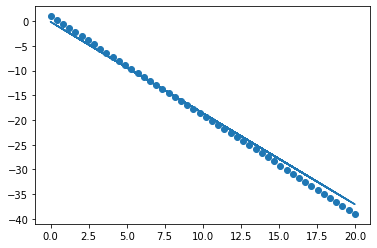

In [37]:
plt.scatter(x_Data, y_Data)
plt.plot(x_Data, y_Pre_F)
plt.show()

In [38]:
r2_score(y_Pre_F, y_Data)

0.9916936642488702

# Mini-Batch GD

In [39]:
J_Plot = []
theta0_Plot = []
theta1_Plot = []
J_Plot_1 = []
theta0_Plot_1 = []
theta1_Plot_1 = []
epoch_Plot = []

def Mini_Batch_GD(x_Data, y_Data):
    alpha = 0.0005
    theta0 = theta1 = 0
    J_errorFunc = 0
    chunked_Batch = []
    batch_Size = 5
    pre_error = np.inf
    
    for j in range(100):

        # for batch in batches:
        for i in range(0, len(x_Data), batch_Size):
            chunked_Batch.append(x_Data[i:i+batch_Size])
            batch = np.array(chunked_Batch[0])
            y_Predict = theta0 + theta1*batch
            err_Vec = y_Predict - y_Data[i:i+batch_Size]
        
            J_errorFunc = np.sum(np.dot(err_Vec, err_Vec)) / (2*(batch_Size))

            J_Plot.append(J_errorFunc)
            theta0_Plot.append(theta0)
            theta1_Plot.append(theta1)

            grad_Th0 = np.sum(err_Vec) / batch_Size
            grad_Th1 = np.sum(np.dot(err_Vec, x_Data[i:i+batch_Size])) / batch_Size

            theta0 = theta0 - alpha*grad_Th0
            theta1 = theta1 - alpha*grad_Th1

            # print("Chunk Batch -->\n", chunked_Batch)
            # print("Chunk [0] -->\n", chunked_Batch[0])
            
            chunked_Batch = []
            
        epoch_Plot.append(j)
        J_Plot_1.append(J_Plot[-1])
        theta0_Plot_1.append(theta0_Plot[-1])
        theta1_Plot_1.append(theta1_Plot[-1])

        if (pre_error - J_errorFunc) < 0.001:
            break
        pre_error = J_errorFunc
            
    return (theta0, theta1)

In [40]:
l0, l1 = Mini_Batch_GD(x_Data=x_Data, y_Data=y_Data)
y_Pre_F = l0 + l1*x_Data

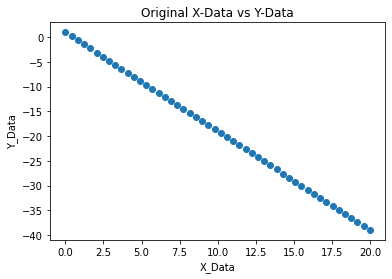

In [41]:
plt.scatter(x_Data, y_Data)
plt.xlabel("X_Data")
plt.ylabel("Y_Data")
plt.title("Original X-Data vs Y-Data")
plt.show()

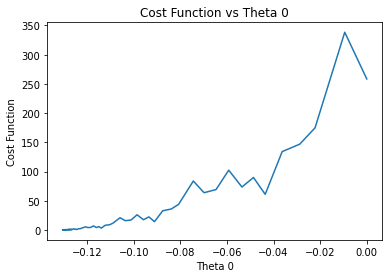

In [42]:
plt.xlabel("Theta 0")
plt.ylabel("Cost Function")
plt.title("Cost Function vs Theta 0")
plt.plot(theta0_Plot, J_Plot)
plt.show()

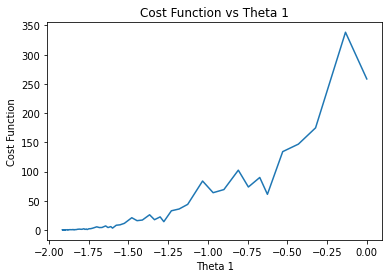

In [43]:
plt.xlabel("Theta 1")
plt.ylabel("Cost Function")
plt.title("Cost Function vs Theta 1")
plt.plot(theta1_Plot, J_Plot)
plt.show()

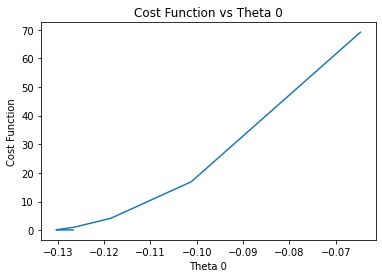

In [44]:
plt.xlabel("Theta 0")
plt.ylabel("Cost Function")
plt.title("Cost Function vs Theta 0")
plt.plot(theta0_Plot_1, J_Plot_1)
plt.show()

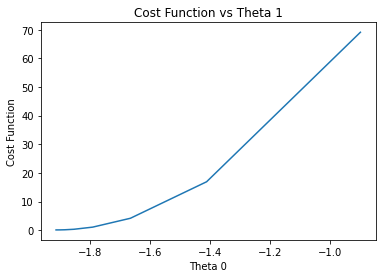

In [45]:
plt.xlabel("Theta 0")
plt.ylabel("Cost Function")
plt.title("Cost Function vs Theta 1")
plt.plot(theta1_Plot_1, J_Plot_1)
plt.show()

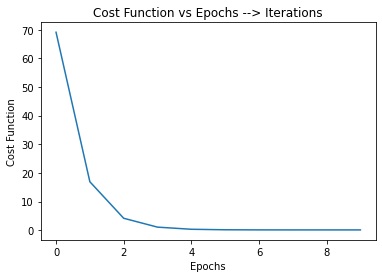

In [46]:
plt.xlabel("Epochs")
plt.ylabel("Cost Function")
plt.title("Cost Function vs Epochs --> Iterations")
plt.plot(epoch_Plot, J_Plot_1)
plt.show()

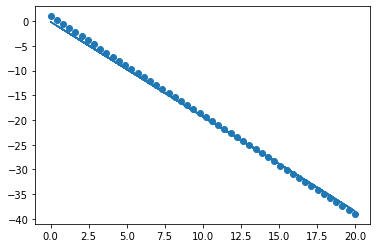

In [47]:
plt.scatter(x_Data, y_Data)
plt.plot(x_Data, y_Pre_F)
plt.show()

In [48]:
r2_score(y_Pre_F, y_Data)

0.9974225183365525

In [ ]:
def batch_GD(iterations,alpha,X,Y):
    #X...............(m,n)
    #theta...........(n,1)
    #y...............(m,1)
    #h...............(m,1)
    #grad............(n,1)
    #cost............(1,1)
    m=X.shape[0]
    n=X.shape[1]
    thetas=np.zeros((n,1))
    cost_list=[]
    theta_list=[]
    for i in range(iterations):
        h=np.dot(X,thetas).reshape(m,1)
        error=h-Y
        cost=(1/(2*m))*np.dot(error.T,error)
        cost_list.append(cost.item())
        theta_list.append(thetas)
        gradient=(1/m)*np.dot(X.T,error).reshape(n,1)
        thetas=thetas-gradient*alpha
        if(np.linalg.norm(gradient)<0.2):
            print("stopped at {} iteration".format(i))
            break
        if(abs(cost_list[i]-cost_list[i-1])<0.001 and i>0):
            print(i)
            break

           
            
    return cost_list,theta_list